# Graphique affichant la distribution de résolution

Plus d'informations sur la campagne dans le README du dossier [courant](./).

## Imports nécessaires

In [1]:
from metrics.wallet import *
from common import *
from matplotlib import rc
rc('text', usetex=True)

## Constantes locales

In [2]:
DISTRIB_FULL = 'fig/3B-distrib_full.pdf'
DISTRIB_UNIQUE = 'fig/3B-distrib_unique.pdf'

## Analyse importée

In [3]:
analysis = import_analysis_from_file(ANALYSIS_03_LIGHT_BASE).remove_experiment_wares({
    '$\mathtt{VBS}(\mathcal{H}^{\mathtt{base}})$'
})

In [4]:
# Suppression des instances communément ratées
analysis = analysis.delete_common_failed_inputs()

## Génération des distributions

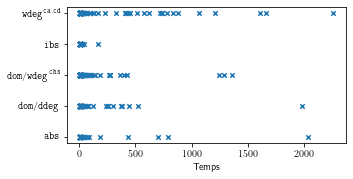

In [5]:
import matplotlib.pyplot as plt

def f(df):
    cpu = df.cpu_time.min()
    return df[df.cpu_time == cpu].iloc[0]

df = analysis.data_frame
df2 = df.groupby('input').agg(f)#.pivot_table(columns='experiment_ware', values='cpu_time', index='input')

#for col in df2.columns:
#    df2[col] = df2[col].sort_values().values
#    
#df2 = df2.dropna(how='all').reset_index(drop=True)
#df2.index += 1

marker_type = 'x'
size = (5,2.5)
order = []

df.sort_values('experiment_ware').plot.scatter(x='cpu_time', y='experiment_ware', marker=marker_type, figsize=size, ylabel='', xlabel='Temps')
plt.savefig(DISTRIB_FULL, transparent=True, bbox_inches='tight')

df2.sort_values('experiment_ware').plot.scatter(x='cpu_time', y='experiment_ware', marker=marker_type, figsize=size, ylabel='', xlabel='Temps')
plt.savefig(DISTRIB_UNIQUE, transparent=True, bbox_inches='tight')